# Introdução
No projeto deste curso, utilizaremos dois conjuntos de dados diferentes:

o MovieLens, do instituto de pesquisa Grouplens, que agrupa avaliações de filmes
o TMDB 5000, disponível no site da comunidade Kaggle, que contém informações como faturamento, orçamento, ano de lançamento, país de origem, entre outras

# Preparar ambiente

In [ ]:
import pandas as pd
import seaborn as sns

#Cores
sns.set_palette("RdBu")

#Estilos
sns.set_style("darkgrid")

# 1. Exploração de dados inicial

In [ ]:
uri='https://raw.githubusercontent.com/FelipeRamosOliveira/DataFrames/master/tmdb_5000_movies.csv'
tmdb=pd.read_csv(uri)
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


## Estatistica descritiva

In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Histogramas e boxplot

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

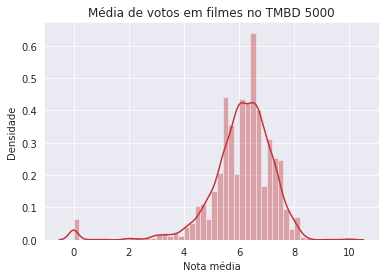

In [ ]:
# Histograma
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMBD 5000')

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

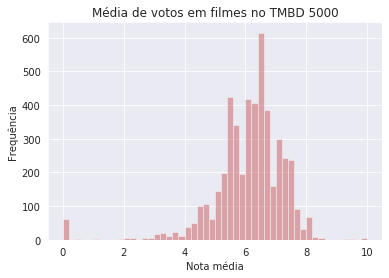

In [ ]:
# Histograma não normalizado

ax = sns.distplot(tmdb.vote_average, norm_hist= False, kde= False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMBD 5000')


Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

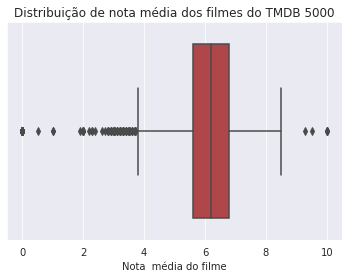

In [ ]:
# Boxplot

ax = sns.boxplot(tmdb.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')

## Identificando e tratando problemas

In [ ]:
# Notas médias iguais a zero
zeros=tmdb.query('vote_average == 0')
zeros.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0


* Note que os filmes com média 0 ou 10 são aqueles com poucos votantes (zero, algumas vezes)

In [ ]:
# Estipular um número mínimo de votantes
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

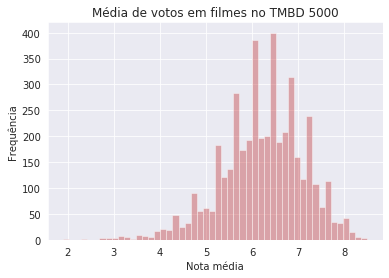

In [ ]:
# Nova distribuição
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist= False, kde= False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMBD 5000')

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

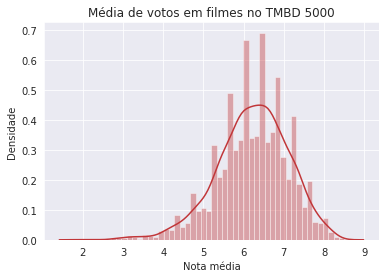

In [ ]:
# Nova densidade
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMBD 5000')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

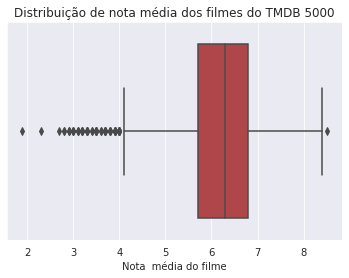

In [ ]:
# Novo boxplot

ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')

## Visualizando e limpando o movielens

In [ ]:
uri='https://raw.githubusercontent.com/FelipeRamosOliveira/DataFrames/master/ratings.csv'
notas=pd.read_csv(uri)
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

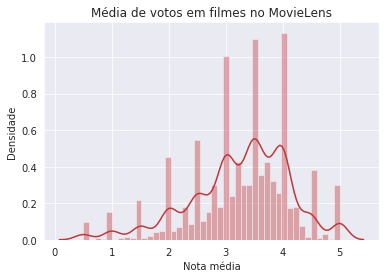

In [ ]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no MovieLens')

In [ ]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
quantidade_de_votos_por_filme.query("rating >= 10")

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102
...,...,...,...
174055,13,13,13
176371,18,18,18
177765,13,13,13


In [ ]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [ ]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

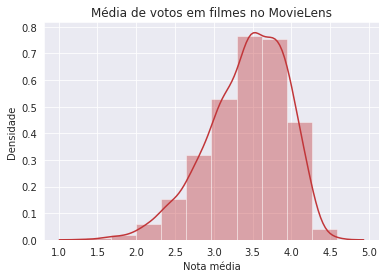

In [ ]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos,bins=10)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no MovieLens')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do MovieLens')

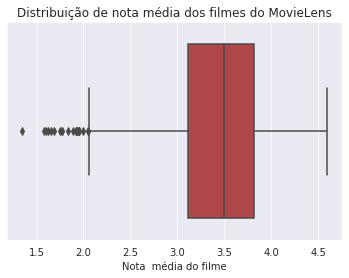

In [ ]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do MovieLens')

## Visualizando a CDF

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

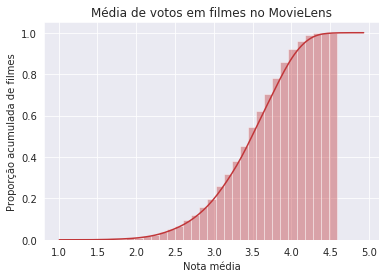

In [ ]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de filmes')
ax.set_title('Média de votos em filmes no MovieLens')

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

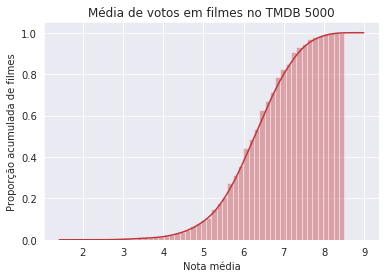

In [ ]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDB 5000')

# 2. Explorando as distribuições das amostras

Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

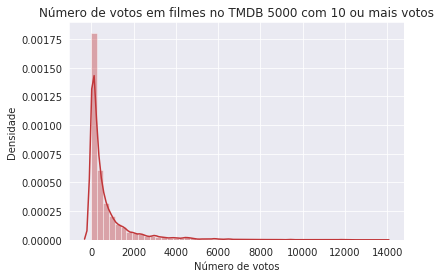

In [ ]:
# número de votos de cada filme
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Número de votos', ylabel='Densidade')
ax.set_title('Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

Text(0.5, 1.0, 'Gastos em filmes no TMDB 5000')

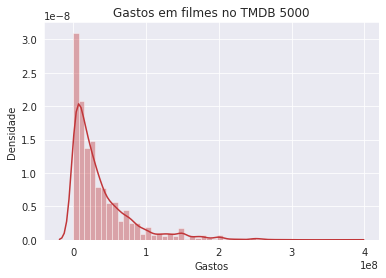

In [ ]:
# distribuição em um histograma do orçamento
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel='Gastos', ylabel='Densidade')
ax.set_title('Gastos em filmes no TMDB 5000')

Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

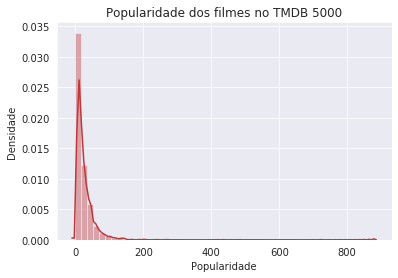

In [ ]:
# distribuição em um histograma da popularidade
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade dos filmes no TMDB 5000')

In [ ]:
# verificar a quantidade de valores null
tmdb.runtime.isnull().sum()

2

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

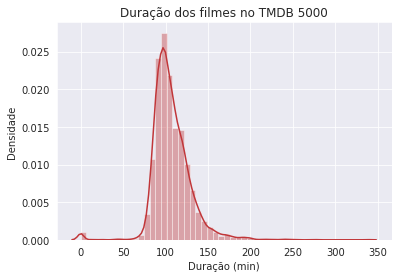

In [ ]:
# distribuição em um histograma do tempo de duração
ax = sns.distplot(tmdb.runtime.dropna())
ax.set(xlabel='Duração (min)', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

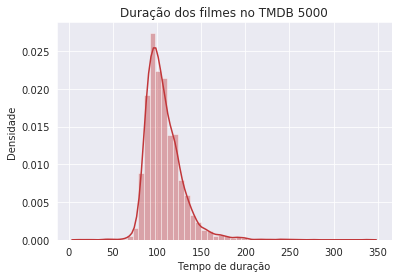

In [ ]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

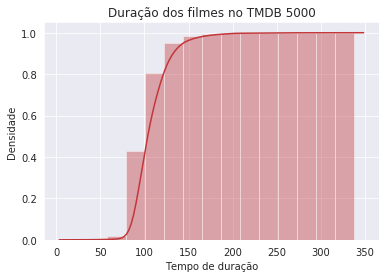

In [ ]:
# histograma cumulativo 
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True},bins=15)
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

In [ ]:
tmdb.query("runtime>0").runtime.dropna().quantile(q=0.8)

121.0

# 3.Testes de uma amostra

In [ ]:
 round(nota_media_dos_filmes_com_pelo_menos_10_votos.mean(),2)

3.43

In [ ]:
nota_media_dos_filmes_com_pelo_menos_10_votos[0:5].mean()

3.5259741603585653

In [ ]:
len(nota_media_dos_filmes_com_pelo_menos_10_votos)

2269

## O efeito do tamanho de uma amostra

In [ ]:
medias = list()
for i in range(1, len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
    medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos[0:i].mean())
medias

[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653,
 3.469175997829668,
 3.420007998139716,
 3.4295335135237663,
 3.4564107421798558,
 3.352874931119765,
 3.396552967684635,
 3.363506887044249,
 3.406839377909513,
 3.4332165225577675,
 3.451002087720583,
 3.405769002692592,
 3.3524884731224396,
 3.3603714480862994,
 3.3531004361987162,
 3.3416954143887807,
 3.331376585132172,
 3.3447231039898004,
 3.3514742733815486,
 3.3879658756270143,
 3.412973556391407,
 3.404174978311576,
 3.425614825316986,
 3.4337122869128076,
 3.4475781010027933,
 3.4424344719950075,
 3.4507430374145236,
 3.4223910131474935,
 3.4190609824460543,
 3.4086964437466603,
 3.4248871013004156,
 3.4171696491401096,
 3.4393473639752203,
 3.4400036363518125,
 3.4550555181639973,
 3.4495614831510744,
 3.455822178683975,
 3.433832556918074,
 3.441766683501375,
 3.4432967795375005,
 3.4437021502486327,
 3.4427521035040973,
 3.4283255881604555,
 3.4216342812642555,
 3.43275

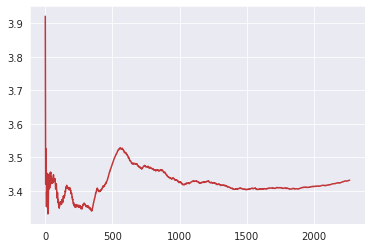

In [ ]:
import matplotlib.pyplot as plt

medias = list()
for i in range(1, len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
    medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos[0:i].mean())
plt.plot(medias)

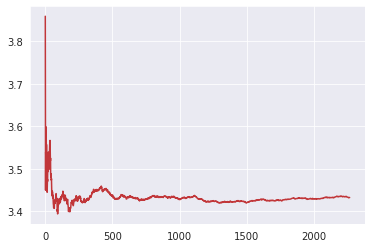

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = list()
for i in range(1, len(temp)):
    medias.append(temp[0:i].mean())
plt.plot(medias)

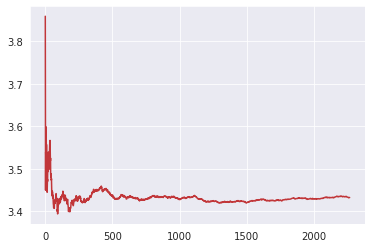

In [ ]:
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = list()
medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

## Intervalo de confiança da média com t e ztest


In [ ]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos

In [ ]:
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# 4.Outros testes

In [ ]:
uri='https://raw.githubusercontent.com/FelipeRamosOliveira/DataFrames/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
notas1 = notas.query("movieId ==1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


(0, 5)

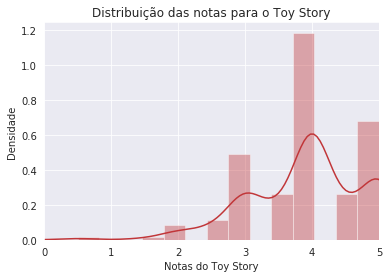

In [ ]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel='Notas do Toy Story', ylabel='Densidade')
ax.set_title('Distribuição das notas para o Toy Story')

plt.xlim(0, 5)

Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

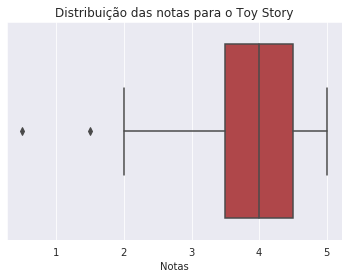

In [ ]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel='Notas')
ax.set_title('Distribuição das notas para o Toy Story')

In [ ]:
notas1.rating.mean()

3.9209302325581397

In [ ]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [ ]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

# Problemas de amostras pequenas


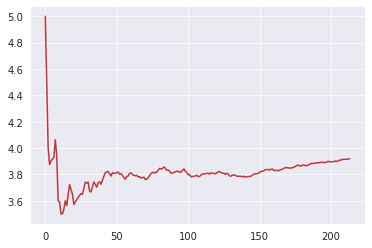

In [ ]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [ ]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603) 
    return (media, p)

medias = [calcula_teste(i) for i in range(2, len(temp))]
medias

[(4.5, 0.032687621135204896),
 (4.0, 0.3252543510880489),
 (3.875, 0.29952196979944745),
 (3.9, 0.15826781784711086),
 (3.9166666666666665, 0.07406936464331344),
 (3.9285714285714284, 0.03058372185045264),
 (4.0625, 0.008546846816661634),
 (3.9444444444444446, 0.034351369792154834),
 (3.6, 0.6797757440816464),
 (3.590909090909091, 0.6661040559180447),
 (3.5, 0.8452594429449549),
 (3.5, 0.8319722700425317),
 (3.5357142857142856, 0.7285036535608292),
 (3.6, 0.5561564945645507),
 (3.5625, 0.6284166359766319),
 (3.6470588235294117, 0.42056196093078513),
 (3.7222222222222223, 0.2692718087435868),
 (3.6842105263157894, 0.3157395629293568),
 (3.65, 0.36558117183067695),
 (3.5714285714285716, 0.5650170364597873),
 (3.590909090909091, 0.4930885087384419),
 (3.608695652173913, 0.4265824656611449),
 (3.625, 0.36578337526912086),
 (3.64, 0.3108287352909964),
 (3.6538461538461537, 0.26171758950670954),
 (3.6481481481481484, 0.2559999054486449),
 (3.6964285714285716, 0.16314137427171593),
 (3.741379

In [ ]:
def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603) 
    return (i, media, p)

medias = [calcula_teste(i) for i in range(2, len(temp))]
medias

[(2, 4.5, 0.032687621135204896),
 (3, 4.0, 0.3252543510880489),
 (4, 3.875, 0.29952196979944745),
 (5, 3.9, 0.15826781784711086),
 (6, 3.9166666666666665, 0.07406936464331344),
 (7, 3.9285714285714284, 0.03058372185045264),
 (8, 4.0625, 0.008546846816661634),
 (9, 3.9444444444444446, 0.034351369792154834),
 (10, 3.6, 0.6797757440816464),
 (11, 3.590909090909091, 0.6661040559180447),
 (12, 3.5, 0.8452594429449549),
 (13, 3.5, 0.8319722700425317),
 (14, 3.5357142857142856, 0.7285036535608292),
 (15, 3.6, 0.5561564945645507),
 (16, 3.5625, 0.6284166359766319),
 (17, 3.6470588235294117, 0.42056196093078513),
 (18, 3.7222222222222223, 0.2692718087435868),
 (19, 3.6842105263157894, 0.3157395629293568),
 (20, 3.65, 0.36558117183067695),
 (21, 3.5714285714285716, 0.5650170364597873),
 (22, 3.590909090909091, 0.4930885087384419),
 (23, 3.608695652173913, 0.4265824656611449),
 (24, 3.625, 0.36578337526912086),
 (25, 3.64, 0.3108287352909964),
 (26, 3.6538461538461537, 0.26171758950670954),
 (27,

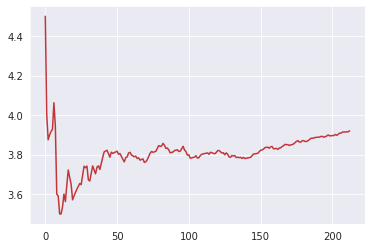

In [ ]:
medias = np.array([calcula_teste(i) for i in range(2, len(temp))])
medias

plt.plot(medias[:,1])

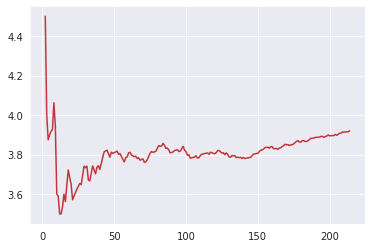

In [ ]:
valores = np.array([calcula_teste(i) for i in range(2, len(temp))])
medias

plt.plot(valores[:,0],valores[:,1])

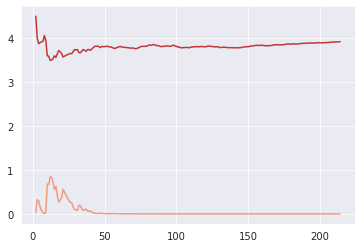

In [ ]:
plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])

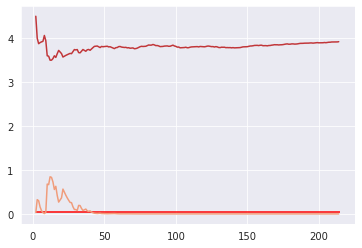

In [ ]:
plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors = 'r')

# 5.Testes para duas amostras

In [ ]:
zconfint(notas1.rating, notas.rating)

(0.2799245129192442, 0.5588219849631111)

In [ ]:
print (ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [ ]:
print (ztest(notas1.rating, notas.rating))
zconfint(notas.rating, notas1.rating)

(5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(notas.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [ ]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
descr_todas_as_notas.get_compare(descr_toystory)

In [ ]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [ ]:
import statsmodels as sm
sm.__version__

'0.10.2'

In [ ]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

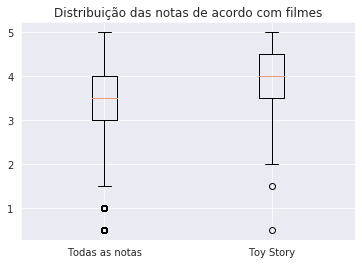

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1.rating], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

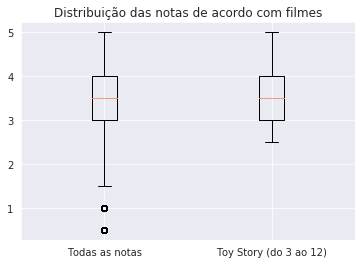

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

In [ ]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# 6.Comparando filmes

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

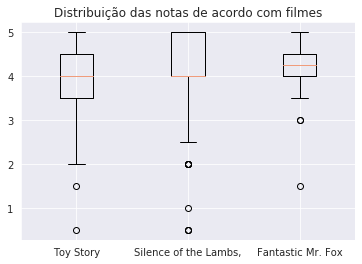

In [ ]:
otas1 =  notas.query("movieId == 1")
notas593 =  notas.query("movieId == 593")
notas72226 =  notas.query("movieId == 72226")

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=["Toy Story", "Silence of the Lambs,", "Fantastic Mr. Fox"])
plt.title("Distribuição das notas de acordo com filmes")

In [ ]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


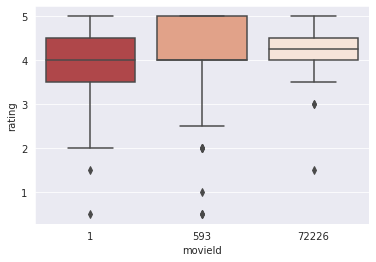

In [ ]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in (1, 593, 72226)"))

In [ ]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [ ]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [ ]:
comparacao = descr_1.get_compare(descr_72226)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [ ]:
notas.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18
